<a href="https://colab.research.google.com/github/TDudo/Coursework/blob/main/Courseproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from IPython.core.display import clear_output
#@title Libraries
#Firstly importing the libraries
!pip install yfinance
import pandas as pd
import numpy as np
import yfinance as yf

import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt

from datetime import datetime

!pip install plotly

clear_output()

In [39]:
#@title NASDAQ Symbols
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
from google.colab import data_table
data_table.enable_dataframe_formatter()
symbols.loc[:, ['Security Name']]

,Security Name
Symbol,
A,"Agilent Technologies, Inc. Common Stock"
AA,Alcoa Corporation Common Stock
AAA,Investment Managers Series Trust II AXS First ...
AAAU,Goldman Sachs Physical Gold ETF Shares
AAC,Ares Acquisition Corporation Class A Ordinary ...
...,...
ZXYZ.A,Nasdaq Symbology Test Common Stock
ZXZZT,NASDAQ TEST STOCK
ZYME,Zymeworks Inc. - Common Stock


Enter the ticker symbols of required companies and the period you want to see. Ticker symbols can be found in NASDAQ Symbols.


In [53]:
#@title Data
#Collecting and modeling stock data

Stock1 = 'MSFT' #@param {type:"string"}
Stock2 = 'AAPL' #@param {type:"string"}
start="2022-09-01"#@param {type:"string"}
end="2023-01-30" #@param {type:"string"}

Stocks = ([Stock1,Stock2])
data = yf.download(Stocks, 
                      start,
                      end,
                      progress=False
                       )
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())
clear_output()

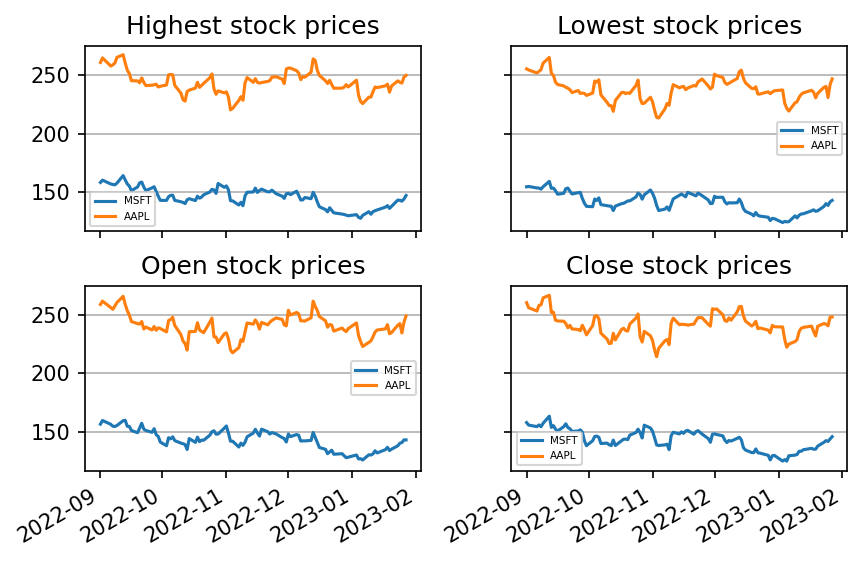

In [54]:
#@title Stock price comparison
#Comparing different stock prices using plotly
from matplotlib import font_manager
fig, ((ln1, ln2), (ln3,ln4)) = plt.subplots(2, 2, sharex = True, sharey = True);
x = data.Date;
y1 = data.High;
y2 = data.Low;
y3 = data.Open;
y4 = data.Close;
ln1.plot(x, y1)
ln1.set_title('Highest stock prices')
ln2.plot(x, y2)
ln2.set_title('Lowest stock prices')
ln3.plot(x, y3)
ln3.set_title('Open stock prices')
ln4.plot(x, y4)
ln4.set_title('Close stock prices')
ln = ln1.grid(axis = 'y'), ln2.grid(axis = 'y'), ln3.grid(axis = 'y'), 
ln4.grid(axis = 'y');
fig.tight_layout();
fig.set_dpi(150);
fig.autofmt_xdate();
ln1.legend([f'{Stock1}',f'{Stock2}'], fontsize = 5);
ln2.legend([f'{Stock1}',f'{Stock2}'], fontsize = 5);
ln3.legend([f'{Stock1}',f'{Stock2}'], fontsize = 5);
ln4.legend([f'{Stock1}',f'{Stock2}'], fontsize = 5);

In [55]:
#@title Stock1 
f = yf.download(Stock1, 
                      start
                      ,
                      end
                      ,
                      progress=False
                       )
f["Date"] = f.index
f = f[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
f.reset_index(drop=True, inplace=True)
print(f.head())
clear_output()

fig = go.Figure(data=[go.Candlestick(x=f['Date'],
                open=f['Open'],
                high=f['High'],
                low=f['Low'],
                close=f['Close'],
                increasing_line_color= 'dark green', decreasing_line_color= 'gold')])

fig.update_layout(
    title=f'{Stock1} Stock Price Change',
)
fig.show()

In [57]:
#@title Stock2
s = yf.download(Stock2, 
                      start
                      ,
                      end
                      ,
                      progress=False
                       )
s["Date"] = s.index
s = f[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
s.reset_index(drop=True, inplace=True)
print(s.head())
clear_output()

fig = go.Figure(data=[go.Candlestick(x=f['Date'],
                open=f['Open'],
                high=f['High'],
                low=f['Low'],
                close=f['Close'],
                increasing_line_color= 'blue', decreasing_line_color= 'gray')])

fig.update_layout(
    title=f'{Stock2} Stock Price Change',
)

fig.show()